# Iris Classfier

## Import Dependencies

In [64]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split


#### The Iris dataset

The [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

#### Load and preprocess the data

First read in the Iris dataset using `datasets.load_iris()`, and split the dataset into training and test sets.

In [65]:
def read_in_and_split_data(iris_data):
    return train_test_split(iris_data['data'], iris_data['target'], test_size=0.1)

In [66]:
# Generate the test and training data.

iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

We will now convert the training and test targets using a one hot encoder.

In [67]:
# Convert targets to a one-hot encoding
train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

#### Build the neural network model


In [1]:
def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape, kernel_initializer='he_uniform', bias_initializer=tf.keras.initializers.Constant(value=1)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model

In [89]:
# Run your function to get the model
model = get_model(train_data[0].shape)

(4,)
4


#### Compile the model

In [90]:
def compile_model(model):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.0001), 
        loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [91]:
compile_model(model)

#### Fit the model to the training data

In [92]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def train_model(model, train_data, train_targets, epochs):
    """
    This function should train the model for the given number of epochs on the 
    train_data and train_targets. 
    Your function should return the training history, as returned by model.fit.
    """
    return model.fit(train_data, train_targets, epochs=epochs, batch_size=40, validation_split=0.15)
    
    

Run the training for 800 epochs.

In [93]:
history = train_model(model, train_data, train_targets, epochs=800)

Train on 114 samples, validate on 21 samples
Epoch 1/800
114/114 [==============================] - 1s 11ms/sample - loss: 1.1029 - accuracy: 0.2544 - val_loss: 1.0347 - val_accuracy: 0.4762
Epoch 2/800
114/114 [==============================] - 0s 624us/sample - loss: 1.0616 - accuracy: 0.3158 - val_loss: 1.0044 - val_accuracy: 0.4762
Epoch 3/800
114/114 [==============================] - 0s 899us/sample - loss: 1.0356 - accuracy: 0.3421 - val_loss: 0.9878 - val_accuracy: 0.7143
Epoch 4/800
114/114 [==============================] - 0s 954us/sample - loss: 1.0149 - accuracy: 0.4912 - val_loss: 0.9680 - val_accuracy: 0.7143
Epoch 5/800
114/114 [==============================] - 0s 881us/sample - loss: 0.9935 - accuracy: 0.5351 - val_loss: 0.9455 - val_accuracy: 0.6667
Epoch 6/800
114/114 [==============================] - 0s 871us/sample - loss: 0.9696 - accuracy: 0.5789 - val_loss: 0.9251 - val_accuracy: 0.9048
Epoch 7/800
114/114 [==============================] - 0s 882us/sample - l

#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss


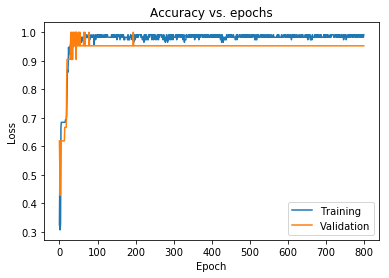

In [41]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

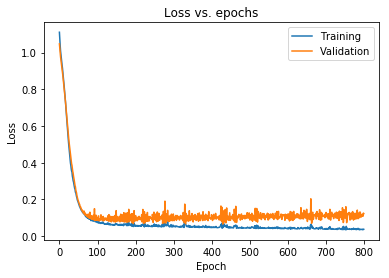

In [42]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

Oh no! We have overfit our dataset. You should now try to now try to mitigate this overfitting.

#### Reducing overfitting in the model

Define a new regularised model with the addition of two dropout layers, weight decay and a batch normalisation layer. 

In [84]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=input_shape, kernel_initializer='he_uniform', bias_initializer=tf.keras.initializers.Constant(value=1)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dropout(dropout_rate),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        BatchNormalization(),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(3, activation='softmax'),
    ])
    return model

#### Instantiate, compile and train the model

In [85]:
# Instantiate the model, using a dropout rate of 0.3 and weight decay coefficient of 0.001

reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [86]:
# Compile the model

compile_model(reg_model)

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f51a2d43bf8>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/data/ops/iterator_ops.py", line 541, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/ops/gen_dataset_ops.py", line 1157, in delete_iterator
    "DeleteIterator", handle=handle, deleter=deleter, name=name)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/op_def_library.py", line 793, in _apply_op_helper
    op_def=op_def)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/func_graph.py", line 544, in create_op
    inp = self.capture(inp)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/func_graph.py", line 594, in capture
    name = tensor.op.name
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py"

In [87]:
# Train the model

reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Train on 114 samples, validate on 21 samples
Epoch 1/800
 40/114 [=========>....................] - ETA: 1s

ValueError: Can not squeeze dim[1], expected a dimension of 1, got 3 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,3].

#### Plot the learning curves

Let's now plot the loss and accuracy for the training and validation sets.

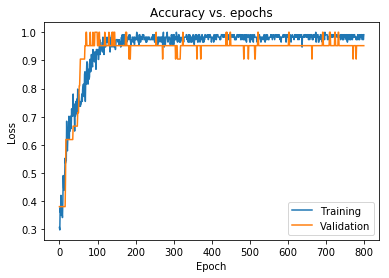

In [50]:
#Run this cell to plot the new accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

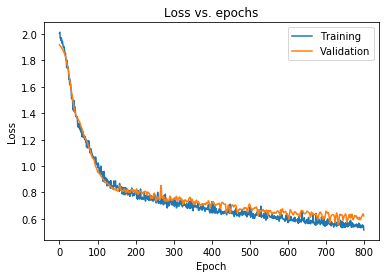

In [51]:
#Run this cell to plot the new loss vs epoch graph

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

We can see that the regularisation has helped to reduce the overfitting of the network.
Incorporate callbacks into a new training run that implements early stopping and learning rate reduction on plateaux.

In [2]:
def get_callbacks():
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=30)
    learning_rate_reduction = ReduceLROnPlateau(factor=0.2, patience=20)
    return (early_stopping, learning_rate_reduction)
    

Run the cell below to instantiate and train the regularised model with the callbacks.

In [60]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

In [58]:
learning_rate_reduction.patience

20

Finally, let's replot the accuracy and loss graphs for our new model.

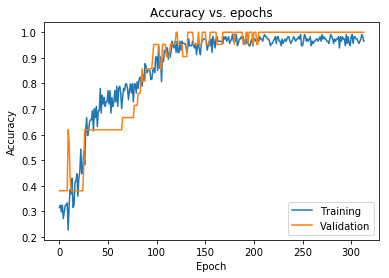

In [61]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

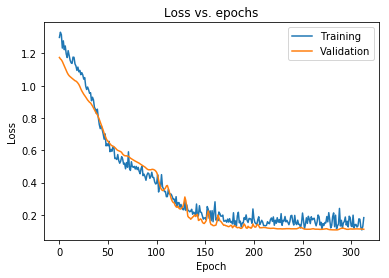

In [62]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [63]:
# Evaluate the model on the test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.087
Test accuracy: 100.00%
